# <b><font size="6">UNIV 6080 Project: Classification with Support Vector Machines</font></b>

Pengfei (Maxwell) Yue

Deparment of Mathematics & Statistics

University of Guelph

yuep@uoguelph.ca

## <b><font size="6">Contents: </font>


<font size="5">1. Introduction to Support Vector Machines</font>

    a. Dependencies and customized dataset
    b. Soft margin SVM and hinge loss
      -   Concepts
      -   Implementation
    c. Dual SVM and Kernels
      -   Concepts
      -   Implementation
        * Dual SMV using Kernels
        * Primal SVM using Kernels


<font size="5">2. Application of Support Vector Machines</font>

    a. Dependencies and dataset
    b. Training
    c. Results


## <font size = 6><b>1. Introduction to Support Vector Machines (SVM)</font>

In this section, we introduce some essential concepts in Support Vector Machines (SVM), including primal SVM, soft margin SVM, hinge loss, dual SVM and kernels. With these theoretical backgroud, a soft margin SVM was implemented from scratch by optimizing the hinge loss using gradient descent algorithm. Additionally, the training of both the primal SVM and Dual SVM with kernels were also implemented from scatch.  

We devide the Subsections 1.b and 1.c into Concepts and Implementation, where we introduce the essential background concepts, and demonstrate the ideas of implementation relating to the optimization and linear algebra knowledge we learnt in Chapter 2, 3 and 7 of the textbook [8], respectively.

The goal of this section is to introduce the essential topics in Support Vector Machines by covering the Mathematical concepts, as well as coding examples from scratch to fit SVM models to 3 customized dataset.

### <font size = 5><b>a. Denpendencies and customized dataset</font>

Here, we load all the dependencies and construct dataset for the implementation in Section 1. The customized dataset were constructed using functions : make_blobs, make_moons, make_circles from an open-source machine learning library, scikit-learn. [5] Numpy library was included in this section for array calculation [6], and matplotlib library was alse used for graphics display [7]. We also use the accuracy_score function from scikit-learn library [5] to report the accuracy at the end of our training.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

We simulate three customized dataset with 2 features, a binary output, and 400 samples. The first 5 inputs, outputs and the plot of all sample are displayed as below.

First five rows and col values 
X1 : 
 [[ 1.24651227  0.44071963]
 [ 2.51888442 -0.09929531]
 [ 1.84679713  0.54890257]
 [ 2.34140654  0.98673341]
 [ 1.07581354  0.85738317]]  
 y1 :
 [1 1 1 1 1]


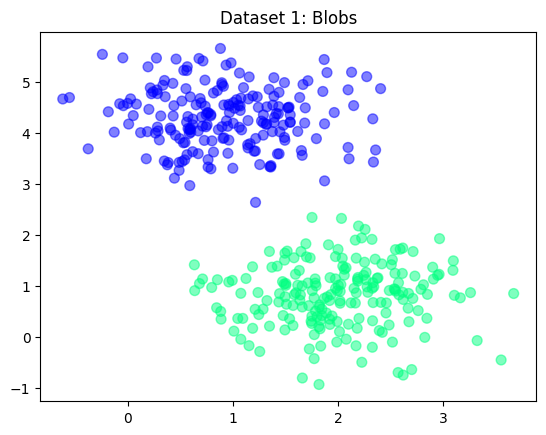

In [2]:
X1, y1 = make_blobs(n_samples=400, centers=2, random_state=0, cluster_std=.6)
y1 = np.where(y1 == 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1: Blobs")
plt.show()

First five rows and col values 
X2 : 
 [[-0.49170893  0.89019723]
 [ 1.26237938 -0.49088759]
 [ 1.56148591 -0.31025182]
 [-1.02205849  0.07141706]
 [ 0.17525523 -0.16086804]]  
 y2 :
 [1 1 1 1 1]


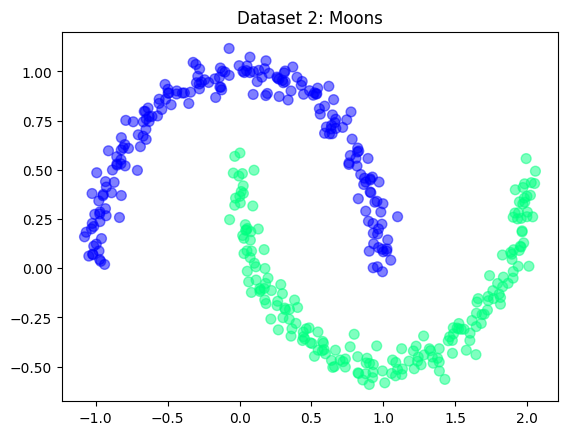

In [3]:
X2, y2 = make_moons(n_samples=400, noise=.05, random_state=0)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2: Moons")
plt.show()

First five rows and col values 
X3 : 
 [[-0.53667782 -0.82537034]
 [-0.3671814  -0.14160841]
 [-0.1872928  -0.49744593]
 [ 0.9689349  -0.10125916]
 [-0.01437323  0.49922045]]  
 y3 :
 [1 1 1 1 1]


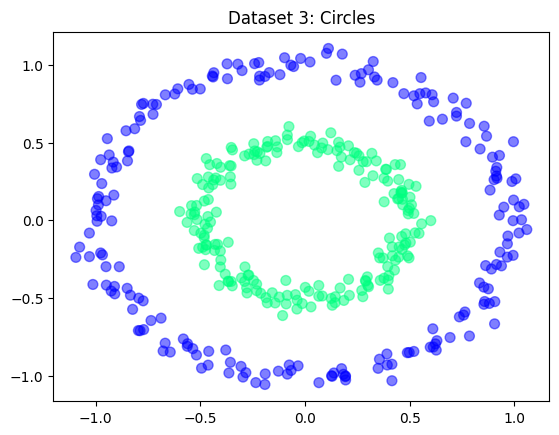

In [4]:
X3, y3 = noisy_circles = make_circles(n_samples=400, factor=.5, noise=.05, random_state=0)
y3 = np.where(y3 <= 0, -1, 1)
print("First five rows and col values \nX3 : \n",X3[:5], " \n y3 :\n",y1[:5])
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 3: Circles")
plt.show()

### <font size = 5><b>b. Soft margin SVM and hinge loss

#### <b>Concepts

Assuming the audience have attained the knowledge of seperating hyperplanes and hard margin SVM, the concepts of Section 1.b in this project are based on Chapter 12.2 from the textbook [8].

<u> Soft margin SVM</u>

On the contrary to hard margin SVM, the soft margin SVM allows for some classification errors. From a geometric view, a slack variable $\xi_n$ corresponding to each example-label pair (sample) $(\mathbf{x}_n, y_n)$, which allows a particular example to be within the margin or even on the wrong side of the hyperplane.

By constraining $\xi_n$ to be non-negative, we can define the soft margin SVM as the following optimization problem: $$
{min}_{\mathbf{\omega}, b, \mathbf{\xi}} \frac{1}{2}||\mathbf{w}||^2 + C \sum_{n=1}^N \xi_n
$$
subject to $$y_n(<\mathbf{w, x}_n>+b) \geq 1-\xi_n$$
$$\xi_n \geq 0$$
, for $n=1,\dots, N$. $C>0$ is the regularization parameter, since it trades off the size of the margin and the total amount of slack $\xi$. $||\mathbf{\omega}||^2$ is the regularizer. Note: Here, larger $C$ implies lower regularization, since more priority would be given to examples that do not lie in the correct margin.

<u>Hinge loss</u>

According to empirical risk minimization: finding the model parameters that minimize the discrepancy between the model's predictions and the actual outcomes in the training data, we can derive the SVM with a different approach. Considering the binary classification problems, the question arises: what is the loss function? It may be intuitive to apply the zero-one loss, which simply counts the misclassification. However, we recognize the challange to solve such combinatorial optimization problems.

Hence, the hinge loss was introduced: $$
l(t) = max\{0, 1-t\}\; where\; t=yf(\mathbf{x}) = y(<\mathbf{w,x}> + b).
$$
If the prediction $f(\mathbf{x})$ is on the right side of the hyperplain based on the label $y$, with distance further than 1, then $t\geq 1$ and $l = 0$. On the other hand, if $f(\mathbf{x})$ is on the right side but with distance less than 1, or it is on the wrong side, the hinge loss returns a positive value.

The hinge loss of the soft margin SVM can be seen as : $$
l(t)=
\begin{cases}
    0 & \text{if } t\geq 1\\
    1-t & \text{if } t<1 \\
\end{cases}
$$
, and the loss corresponding to the hard margin SVM is defined as:
$$
l(t)=
\begin{cases}
    0 & \text{if } t\geq 1\\
    \infty & \text{if } t<1 \\
\end{cases}
$$

Given training set {$(x_1,y_1), \dots, (x_N, y_N)$}, we can define an unconstrained optimization problem using the hinge loss, while applying the $l_2$-regularization: $$
min_{\omega, b} \frac{1}{2}||\omega||^2 + C \sum_{n=1}^N max\{0, 1-y_n(<\omega, x_n>+b)\}
$$, where the first term in the regularizer, and the second term is the loss term.

#### <b><font size = 4>Implementation

Here we want to implement a soft margin SVM using the hinge loss. To training to mdoel on a dataset, we use mini-batch stochastic gradient descent to minimize the hinge loss. Not surprisingly, the soft margin SVM only learns well on dataset 1 because it is linear seperable. In Section 1.c, we will introduce methods to overcome the linearity problem we are facing with dataset 2 and 3.

Note: If setting the batch size to 1, then it is stochastic gradient descent. If setting the batch size equal to the sample size (number of samples), then it would be the (batch) gradient descent. Here, we will omit the *theories* on these algorithms, whcih are covered in Chapter 7 of the textbook [8].

This implementation is based on a blog, Implementing SVM from Scratch Using Python [1].

##### <b>Definining functions

In [5]:
class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

        # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=24, learning_rate=0.001, epochs=1000, seed = 42):
        # setting random seed, making results reproducible
        np.random.seed(seed)

        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly -> stochasity in gradient descent
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses
            losses.append(l)

            # interating through the first element of each mini-batch
            for batch_initial in range(0, number_of_samples, batch_size):
                # zero grad for batch training
                gradw = 0
                gradb = 0

                # interating through all element in each mini-batch
                for j in range(batch_initial, batch_initial + batch_size):
                    if j < number_of_samples: # handle the exception in the last mini-batch
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w = w
        self.b = b

        print(f'Loss: {losses[-1]}')
        print(f'Accuracy: {accuracy_score(self.predict(X), Y)}')
        print(f'w, b: {self.w, self.b}')
        plt.plot(losses)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title("loss over epochs")
        plt.show()

        return self.w, self.b, losses

    def predict(self, X):

        prediction = np.dot(X, self.w[0]) + self.b # w@x + b, here the w is of shape (1,2)
        return np.sign(prediction)

In [6]:
# Visualizing the scatter plot of the dataset
# def visualize_dataset(X, y):
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter', alpha=.5)


# Visualizing SVM
def visualize_svm(X, y, w, b):

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x - b + offset) / w[0][1]

    fig = plt.figure()
    # ax = fig.add_subplot(1,1,1)
    # plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, cmap='winter', alpha=.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter', alpha=.5)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    plt.plot([x0_1, x0_2], [x1_1, x1_2], "r--", alpha=0.5)
    plt.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k", alpha=0.5)
    plt.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k", alpha=0.5)

    # x1_min = np.amin(X[:, 1])
    # x1_max = np.amax(X[:, 1])
    # plt.ylim([x1_min - 3, x1_max + 3])

    plt.show()

#####<b> Fitting dataset 1

We can see the soft margin SVM can well seperate the two classes with an accuracy score of 1.0, since the dataset is linear seperable.

Loss: 0.1317197359628793
Accuracy: 1.0
w, b: (array([[ 0.31871927, -1.06859448]]), 2.2659999999996208)


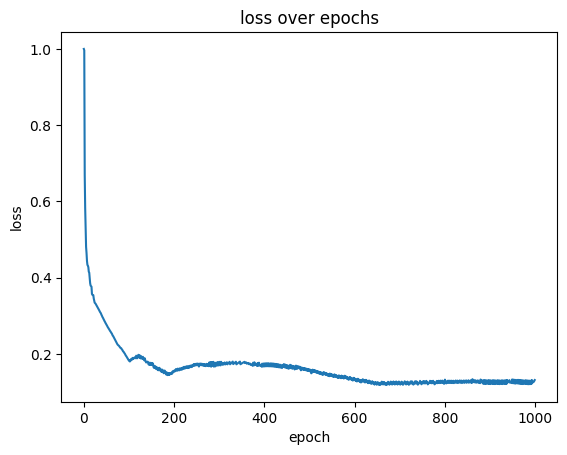

In [7]:
svm = SVM()

w, b, losses = svm.fit(X1, y1)

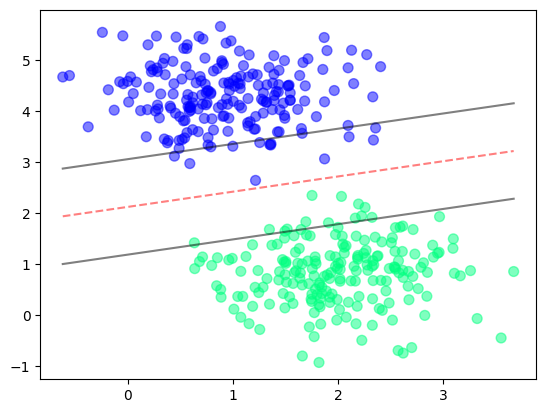

In [8]:
#visualize_dataset(X1, y1)
visualize_svm(X1, y1, w, b)

##### <b>Fitting dataset 2

We observe that the soft margin SVM model only be able to each an accuracy around 0.86, by trying different training hyperparameters. This is due to the non-linear seperable nature in dataset 2.

Loss: 0.2246856628640212
Accuracy: 0.865
w, b: (array([[ 0.67058459, -1.59254406]]), 0.09400000000000004)


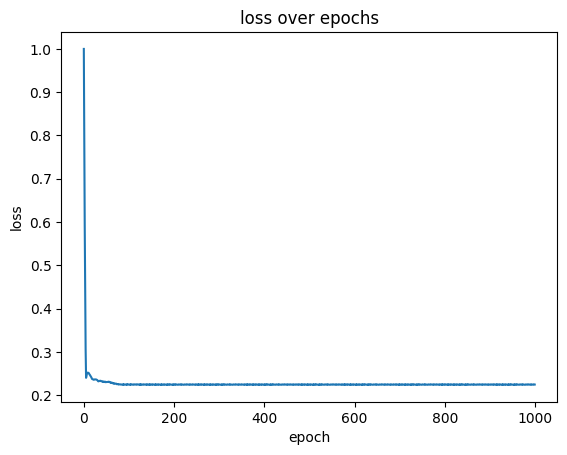

In [9]:
svm = SVM()

w, b, losses = svm.fit(X2, y2)

In [10]:
prediction = svm.predict(X2)

# Loss value
loss = losses.pop()

print("Loss:", loss)
# print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y2))
print("w, b:", [w, b])

Loss: 0.2246856628640212
Accuracy: 0.865
w, b: [array([[ 0.67058459, -1.59254406]]), 0.09400000000000004]


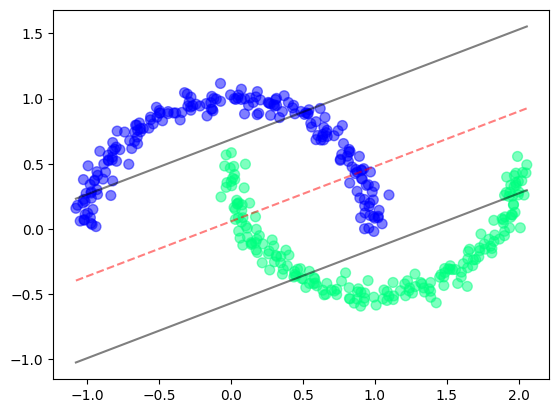

In [11]:
#visualize_dataset(X1, y1)
visualize_svm(X2, y2, w, b)

##### <b> Fitting dataset 3

From the training loss history, we can see the soft margin SVM model failed to learn on this dataset.

Loss: 1.0131800483324929
Accuracy: 0.49
w, b: (array([[0.03912326, 0.01345418]]), -1.734723475976807e-18)


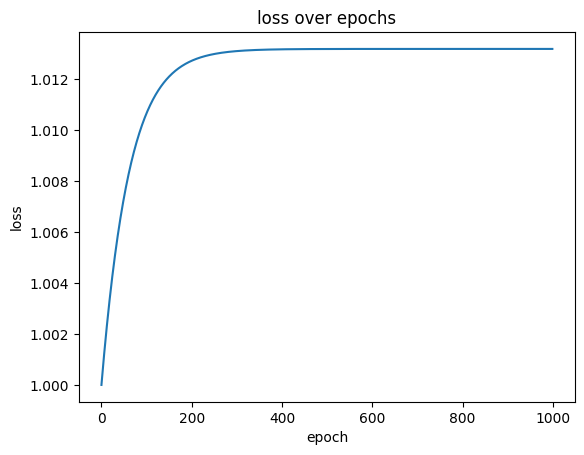

In [12]:
svm = SVM()

w, b, losses = svm.fit(X3, y3)

In [13]:
prediction = svm.predict(X3)

# Loss value
loss = losses.pop()

print("Loss:", loss)
# print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y3))
print("w, b:", [w, b])

Loss: 1.0131800483324929
Accuracy: 0.49
w, b: [array([[0.03912326, 0.01345418]]), -1.734723475976807e-18]


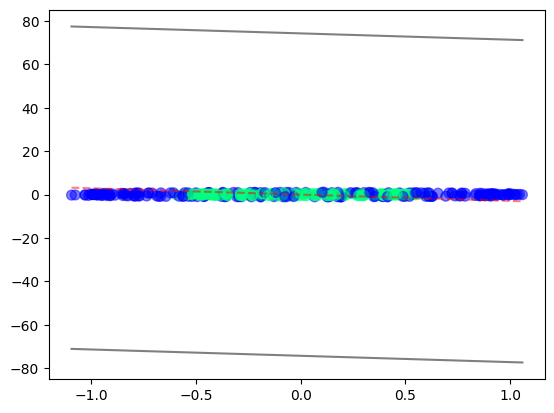

In [14]:
#visualize_dataset(X1, y1)
visualize_svm(X3, y3, w, b)

### <b><font size = 5>c. Dual SVM and kernels</font>

#### <b>Concepts

The concepts in this Subsection is based on Chapter 12.3 and 12.4 in the textbook [8].

<u>Dual SVM </u>

Recall the primal SVM in previous section, it takes inputs $x\in R^D$ with $D$ features, and $\omega$ is the same dimension as $x$. This means that the number of parameters of the optimization problem grows linearly with the number of features.

Dual SVM consider an equivalent optimization problem that is independent of the number of features but the number of examples, which can be useful when there are more features than examples. Kernels can also be applied to dual SVM.

Recall the primal soft margin SVM: $$
{min}_{\mathbf{\omega}, b, \mathbf{\xi}} \frac{1}{2}||\mathbf{w}||^2 + C \sum_{n=1}^N \xi_n
$$
subject to $$y_n(<\mathbf{w, x}_n>+b) \geq 1-\xi_n$$
$$\xi_n \geq 0$$
$\omega, b, \xi$ are called the primal variables. We use $\alpha_n \geq 0$ as the Lagrange multiplier to the first constrain, and $\gamma_n \geq 0$as the lagrange multiplier to the non-negativity constraint of the slack variable. The Lagrangian is given by
$$\mathcal{L}(\omega, b, \xi, \alpha, \gamma) = \frac{1}{2}||\omega||^2 + C\sum_{n=1}^N \xi_n - \sum_{n=1}^N \alpha_n(y_n(<\omega, x_n>+b)-1+\xi_n) - \sum_{n=1}^N \gamma_n\xi_n $$

We can further obtain the derivatives w.r.t. the primal variables $$
\frac{∂\mathcal{L}}{\partial\omega} = \omega^T - \sum_{n=1}^N
\alpha_n y_n x_n^T$$
$$\frac{∂\mathcal{L}}{\partial b} = -\sum_{n=1}^N\alpha_n y_n$$
$$\frac{∂\mathcal{L}}{\partial\xi_n} = C-\alpha_n-\gamma_n$$
By setting $\frac{∂\mathcal{L}}{\partial\omega}=0$, we find $\omega = \sum_{n=1}^N \alpha_n y_n x_n$. Substituting it along with $\frac{\partial \mathcal{L}}{\partial b} = 0,\; \frac{\partial \mathcal{L}}{\partial\xi_n} = 0$ into the Lagrangian and simplify, we obtain the dual:
$$
\mathcal{D}(\xi, \alpha, \gamma) = -\frac{1}{2}\sum_{i=1}^N \sum_{j=1}^N y_i y_j \alpha_i \alpha_j <x_i, x_j>
+ \sum_{i=1}^N \alpha_i$$
By deriving the dual and $\gamma_i \geq 0$, we can conclude that $0\leq \alpha_i\leq C$.

Now, we can formulate the dual SVM as minimizing the negative dual problem:
$$
{min}_\alpha\frac{1}{2}\sum_{i=1}^N \sum_{j=1}^N y_i y_j \alpha_i \alpha_j <x_i, x_j> - \sum_{i=1}^N \alpha_i
$$
subject to $$\sum_{i=1}^N y_i \alpha_i = 0$$

$$0\leq \alpha_i\leq C$$ for all $i=1,\dots,N$

Once the dual parameters $\mathbf{\alpha}$ are obtained, we can recover the primal parameters $\mathbf{\omega}$. Assuming the optimal primal parameter is $\omega^*$, and consider an example $\mathbf{x_n}$ that lies exactly on the margin's boundary, then $$b^* = |y_n-<\omega^*, x_n>|.$$


<u> Kernels</font></u>

As introduced in dual SVM, the inner product in the objective is only between examples $x_i$ and $x_j$. if we consider a feature representation $\phi(x)$ to represent $x$. Since $\phi(x)$ could be a non-linear function, in addition to the soft margin, we can deal with non-linearly seperable dataset.

Instead of defining $\phi(\cdot)$ explicitly, we can define a similarity function $k(x_i, x_j)$, so called kernels. By definition, kernels are functions $k: \mathcal{X}\times\mathcal{X} \to\mathcal{R}$ for which there exists a Hilbert space $\mathcal{H}$ and $\phi: \mathcal{X} \to \mathcal{H}$ a feature map s.t. $$
k(x_i, x_j) = <\phi(x_i), \phi(x_j)>_{\mathcal{H}}.
$$
The well-known kernel trick comes from the generalization from an inner product to a kernel function as it hides away the explicit non-linear feature map.

The matrix $\mathcal{K}\in R^{N\times N}$, resulting from the inner products or the application of $\mathcal{k}(⋅, ⋅)$ to a dataset, is the kernel matrix, and it is symmetrix and positive semidefinite.

<u>Support Vectors</u>

In SVM, the support vectors are the data points that are used to define the optimal decision boundary (hyperplane). These are the points that either lie on the margin or inside the margin boundaries. The position of these points influences the placement and orientation of the decision boundary.

<u>Radial Basis Function (RBF) Kernel</u>

RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. The RBF kernel function for two points $x_1$ and $x_2$ computes the similarity or how close they are to each other. This kernel can be mathematically represented as follows:$$
k(x_1, x_2) = exp(-\frac{||x_1-x_2||^2}{2\sigma^2})
$$
, where $\sigma$ is the variance, a hyperparameter controlling the smoothness of the decision boundary. A smaller $\sigma$ results in a more complex decision boundary that can fit the training data more closely (potentially leading to overfitting). On the other hand, a larger $\sigma$ results in a smoother decision boundary that generalizes better to unseen data. Additionally, $||x_1-x_2||^2$ is the $L_2$-norm between two points $x_1$ and $x_2$.

<u>Polynomial Kernel</u>

For d-degree polynomials, the polynomial kernel is defined as: $$
k(x_1, x_2) = (x_1^Tx_2 + c)^d
$$
, where $x_1$ and $x_2$ are points in the input space, and $c ≥ 0$ is a free parameter trading off the influence of higher-order versus lower-order terms in the polynomial. The higher the degree, the more complex the decision boundary can be. However, choosing an excessively high degree can lead to overfitting.

#### <b>Implementation

Here, we implement a Dual SVM using Kernel and a Primal SVM using Kernel seperately. We also test each model on dataset 2 and 3. This implementation is based on a blog article, Support Vector Machines for Beginners [3].

##### <b>Dual SVM using kernels

From the concepts section, we can construct the minimizing dual problem with kernels:
$$
{min}_\alpha\mathcal(L)(\alpha) =
{min}_\alpha\frac{1}{2}\sum_{i=1}^N \sum_{j=1}^N y_i y_j \alpha_i \alpha_j k(x_i, x_j) - \sum_{i=1}^N \alpha_i
$$
Now, we consider only the k-th $\alpha$ term. Then, $$
\mathcal{L}(\alpha) = \frac{1}{2} \sum_{j=1}^N y_k y_j \alpha_k \alpha_j k(x_k, x_j) - \alpha_k
$$
$$\implies$$
$$
Δ\mathcal{L}(\alpha) = (\frac{\partial\mathcal{L}(\alpha)}{\partial\alpha_1},\frac{\partial\mathcal{L}(\alpha)}{\partial\alpha_2}, \dots, \frac{\partial\mathcal{L}(\alpha)}{\partial\alpha_k},\dots,\frac{\partial\mathcal{L}(\alpha)}{\partial\alpha_N})
$$
, where
$$
\frac{\partial \mathcal{L}(\alpha)}{\partial \alpha_k} = y_k\sum_{j=1}^N\alpha_j y_j k(x_k, x_j) -1
$$

We will use gradient descent to minimize this loss function $\mathcal{L}(\alpha)$ with the derivatives we found, and updating each component $\alpha_k$ independently as follows:
$$
\alpha_k = \alpha_k + \eta\frac{\partial\mathcal{L}(\alpha)}{\partial\alpha_k}
$$, where $\eta$ is the learning rate.

Note: We omitted the some derivations here to keep the simplicity of this project.

###### <b>Define functions

In [15]:
class Dual_SVM_Kernel:
  def __init__(self, C=1.0, kernel='rbf', sigma=0.1, degree=2):
    self.C = C
    if kernel == 'poly':
      self.kernel = self._polynomial_kernel
      # we set c = 1 by default, ignoring the trade off btw higher order and lower order terms.
      self.c = 1
      self.degree = degree
    else:
      self.kernel = self._rbf_kernel
      self.sigma = sigma

    self.X = None
    self.y = None
    self.alpha = None
    self.b = 0
    self.ones = None

  def _rbf_kernel(self, X1, X2):
    # define rbf/Gaussian kernel
    return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], axis=2) ** 2)

  def _polynomial_kernel(self, X1, X2):
    # define polynomial kernel
    return (self.c + X1.dot(X2.T)) ** self.degree

  def fit(self, X, y, lr=1e-3, epochs=500, seed = 42):

    # setting random seed, making results reproducible
    np.random.seed(seed)

    self.X = X
    self.y = y

    # initialization
    self.alpha = np.random.random(X.shape[0])
    self.b = 0
    self.ones = np.ones(X.shape[0])

    y_iy_jk_ij = np.outer(y, y) * self.kernel(X, X)

    losses = []
    for _ in range(epochs):
      # optimized by batch gradient descent
      gradient = y_iy_jk_ij.dot(self.alpha) - self.ones

      self.alpha = self.alpha - lr * gradient

      # setting boundaries for the langrange multiplier
      self.alpha[self.alpha > self.C] = self.C
      self.alpha[self.alpha < 0] = 0

      # calculating the hinge loss
      loss = 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_iy_jk_ij) - np.sum(self.alpha)
      losses.append(loss)

    index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
    b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))

    self.b = np.mean(b_i)

    print(f'Loss: {losses[-1]}')
    print(f'Accuracy: {accuracy_score(self.predict(X), y)}')
    plt.plot(losses)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title("loss over epochs")
    plt.show()

  def _decision_function(self, X):
    return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

  def predict(self, X):
    return np.sign(self._decision_function(X))

  def score(self, X, y):
    y_hat = self.predict(X)
    return np.mean(y == y_hat)

  def plot_decision_boundary(self):
    plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=.5)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = self._decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors=['black', 'r', 'black'], levels=[-1, 0, 1], alpha=0.5,
                linestyles=['-', '--', '-'], linewidths=[2.0, 2.0, 2.0])


    # highlight the support vectors
    ax.scatter(self.X[:, 0][self.alpha > 0.], self.X[:, 1][self.alpha > 0.], s=50,
                linewidth=1, facecolors='none', edgecolors='k', label='support vectors')

    if self.kernel == self._polynomial_kernel:
      title = f'Polynomial Kernel (degree = {self.degree})'
    else:
      title = f'RBF Kernel (sigma = {self.sigma})'

    plt.legend()
    plt.title(title)
    plt.show()

###### <b> Dataset 2

On the countrary to the 'vanila' soft margin SVM we implemented in the last subsection, the Dual SVM using the Radial Basis Function kernel is able to classify Dataset 2 and score an accuracy of 1.0. We also record the elapsed time of the training for comparision with the Primal SVM using the same RBF kernel and training hyperparameters.

In [16]:
svm = Dual_SVM_Kernel(C=1.0, kernel='rbf', sigma=0.4)

Loss: -7.839690645634463
Accuracy: 1.0


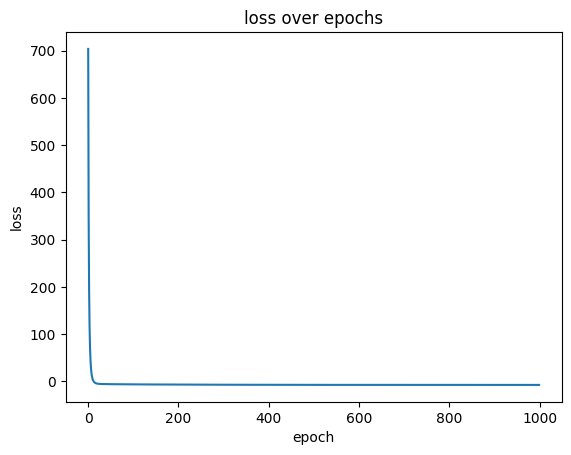

Ellapsed training time: 1.434704065322876


In [17]:
start = time.time()
svm.fit(X2, y2, lr=1e-2, epochs=1000)
end = time.time()

print(f'Ellapsed training time: {end - start}')

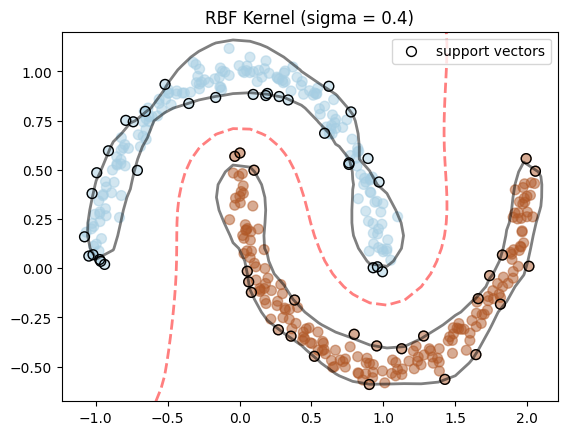

In [18]:
svm.plot_decision_boundary()

###### <b>Dataset 3

Similarly, a Dual SVM with 2-degree polynomial kernel can classity Dataset 3 with a perfect accuracy.

In [19]:
svm = Dual_SVM_Kernel(C=1.0, kernel='poly', degree = 2)

Loss: -16.65539992990457
Accuracy: 1.0


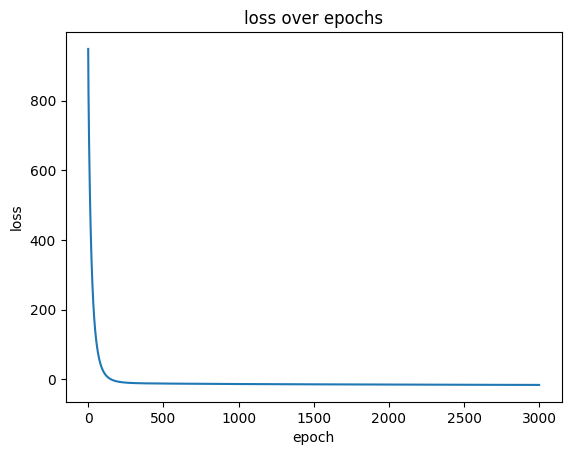

In [20]:
svm.fit(X3, y3, lr=1e-3, epochs=3000)

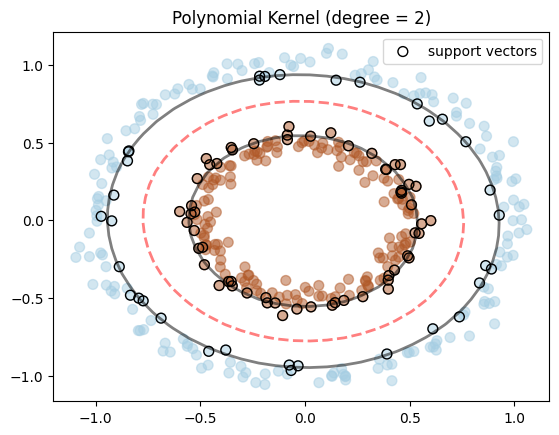

In [21]:
svm.plot_decision_boundary()

##### <b>Primal SVM using kernels

We introduced the dual SVM from primal SVM to apply the kernel. However, the kernel trick is also applicable to the primal form. [2] In this article [3], the author proposed a way to implement kernel with primal SVM. Due to performance issues, to apply the kernel trick, the dual SVM is still prefered. [4] In this section, we only aim to demonstrate the feasibility to apply kernels to the primal form.

Recall the hinge loss we introduced in Section 1.b: $$
min_{\omega, b} \frac{1}{2}||\omega||^2 + C \sum_{n=1}^N max\{0, 1-y_n(<\omega, x_n>+b)\}
$$
Now, we want to express the weight vector $\omega$ as a linear combination of the point $\phi(x_n)$ in the feature space with coefficient $w$. That is,$$
\omega = \sum_{n=1}^N w_n\phi(x_n) = \phi(x)^Tw
$$
The mathematical derivation of the algorithms will be emitted here due to its complexity.
Then, we can write the hinge loss as:
\begin{align}
\mathcal{L} &= \frac{1}{2}w^T \phi(x)\phi(x)^T w + C\sum_{n=1}^N max\{0, 1-y_n(w^T\phi(x)\phi(x_i)+b)\}\\ &= \frac{1}{2}w^T k(x,x^T) w + C\sum_{n=1}^N max\{0, 1-y_n(w^Tk(x,x_i)+b)\}
\end{align}
Now we have a primal loss function with the kerel.

As we learnt in Chapter 7, to find optimize using any form of gradient descent algorithm, it is essential to fint the derivatives of $\mathcal{L}$ with respective to $\alpha$ and $b$: $$
\frac{\partial \mathcal{L}}{\partial w} = k(x,x^T)w - C\sum_{n=1, \xi_n\geq0}^Ny_n k(x,x_n)
$$$$
\frac{\partial \mathcal{L}}{\partial b} = -C\sum_{n=1, \xi_n\geq0}^N y_n
$$
With what we have disscussed so far, to make a prediction, we have: $$
\hat{y}(z) = sign(\omega^Tz+b) = sign(w^Tk(x,z)+b)
$$

###### <b>Define functions

In [22]:
class Primal_SVM:
  def __init__(self, C=1.0, kernel='rbf', sigma=.1, degree=2):

    if kernel == 'poly':
        self.kernel = self._polynomial_kernel
        self.c = 1
        self.degree = degree
    else:
        self.kernel = self._rbf_kernel
        self.sigma = sigma

    self._support_vectors = None
    self.C = C
    self.w = None
    self.b = None
    self.X = None
    self.y = None
    self.K = None

  def _rbf_kernel(self, X1, X2):
    # applying the rbf kernel
    return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], axis=2) ** 2)

  def _polynomial_kernel(self, X1, X2):
    # applying polynomail kernel
    return (self.c + X1.dot(X2.T)) ** self.degree

  def fit(self, X, y, lr=1e-5, epochs=500, seed = 42):
    # setting random seed, making code reproducible
    np.random.seed(seed)

    # Initialize Beta and b
    self.w = np.random.randn(X.shape[0])
    self.b = 0

    self.X = X
    self.y = y
    # Kernel Matrix
    self.K = self.kernel(X, X)

    losses = []
    for _ in range(epochs):
      # optimized by batch gradient descent
      margin = self.__margin(X, y)
      # getting the indices of misclassified pts used for calculating gradients
      misclassified_pts_idx = np.where(margin < 1)[0]
      # dL / dw
      d_w = self.K.dot(self.w) - self.C * y[misclassified_pts_idx].dot(self.K[misclassified_pts_idx])
      self.w = self.w - lr * d_w

      # dL / db
      d_b = - self.C * np.sum(y[misclassified_pts_idx])
      self.b = self.b - lr * d_b

      # implement the hinge loss
      loss = (1/2) * self.w.dot(self.K.dot(self.w)) + self.C * np.sum(np.maximum(0, 1 - margin))
      losses.append(loss)

    # as demonstrated in concepts, s.v. are the points either lie on the margin or inside the margin
    self._support_vectors = np.where(self.__margin(X, y) <= 1)[0]

    print(f'Loss: {losses[-1]}')
    print(f'Accuracy: {accuracy_score(self.predict(X), y)}')
    plt.plot(losses)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title("loss over epochs")
    plt.show()


  def __decision_function(self, X):
    return self.w.dot(self.kernel(self.X, X)) + self.b

  def __margin(self, X, y):
    return y * self.__decision_function(X)

  def predict(self, X):
    return np.sign(self.__decision_function(X))

  def score(self, X, y):
    prediction = self.predict(X)
    return np.mean(y == prediction)

  def plot_decision_boundary(self):
    plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap='winter', alpha=.5)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = self.__decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors=['black', 'r', 'black'], levels=[-1, 0, 1], alpha=0.5,
                linestyles=['-', '--', '-'], linewidths=[2.0, 2.0, 2.0])

    # highlight the support vectors
    ax.scatter(self.X[:, 0][self._support_vectors], self.X[:, 1][self._support_vectors], s=50,
                linewidth=1, facecolors='none', edgecolors='k')

    if self.kernel == self._polynomial_kernel:
      title = f'Polynomial Kernel (degree = {self.degree})'
    else:
      title = f'RBF Kernel (sigma = {self.sigma})'
    plt.title(title)
    plt.show()

###### Dataset 2

Similarl to the Dual SVM using Radial Basis Function (RBF) kernel, the Primal SVM with RBF kernel can fit Dataset 2 with no issues. However, we do notice a consistant longer training time comaparing with the Dual SVM under the training settings. This may due to the feasibility of matrix operation in the Dual SVM implemention.

In [23]:
svm = Primal_SVM(C=1.0, kernel='rbf', sigma=.4)

Loss: 10.58413255775286
Accuracy: 1.0


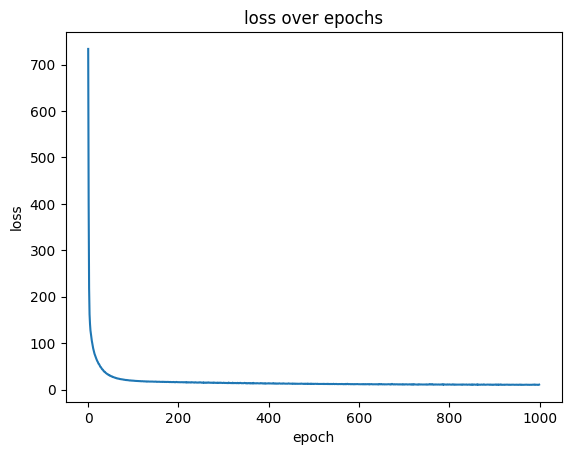

Ellapsed training time: 18.069851636886597


In [24]:
start = time.time()
svm.fit(X2, y2, lr=1e-3, epochs=1000)
end = time.time()

print(f'Ellapsed training time: {end - start}')

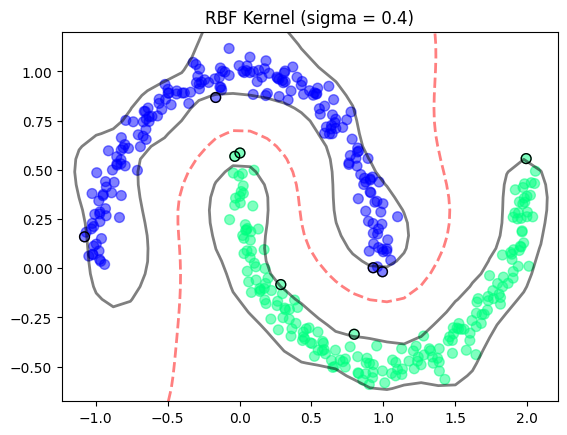

In [25]:
svm.plot_decision_boundary()

###### Dataset 3

Similarl to the Dual SVM using Radial Basis Function (RBF) kernel, the Primal SVM with RBF kernel can fit Dataset 3 with no issues.

In [26]:
svm = Primal_SVM(C=1.0, kernel='poly', degree=2)

Loss: 18.3012710946472
Accuracy: 1.0


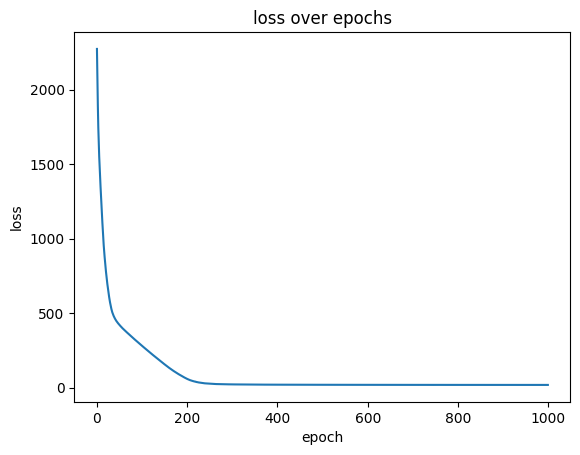

In [27]:
svm.fit(X3, y3, lr=1e-5, epochs=1000)

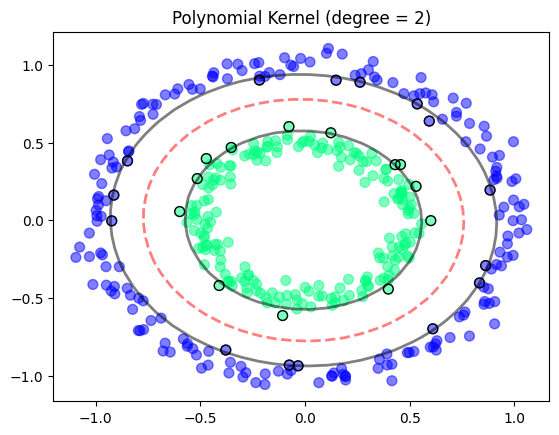

In [28]:
svm.plot_decision_boundary()

## <font size = 6><b> 2. Application of Support Vector Machines

In this Section, we try to applied what we learnt in Section 1 to a real world problem: building a SVM to identify 7 different types of dry beans.

Acknowledgement: A portion of the code utilized in this work was adapted from a blog post titled "SVM for Multiclass Classification" [10].

### <font size = 5><b>a. Dependencies and dataset

Numpy library was included in this section for array calculation [6], and matplotlib library was alse used for graphics display [7].

In [29]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

The dataset consists of seven different types of dry beans, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains. The dataset were imported from [9].

In [30]:
pip install ucimlrepo

In [31]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean_dataset = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets

# metadata
print(dry_bean_dataset.metadata)

# variable information
print(dry_bean_dataset.variables)

{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [32]:
# construct dataset of inputs and outputs
df = pd.concat([X, y], axis=1)

# show the first 5 samples
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [33]:
# checking missing values in dataset
print("Any missing sample in dataset:",df.isnull().values.any())

Any missing sample in dataset: False


In [34]:
# listing 7 types of class labels
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [35]:
#Frequency distribution of class labels
train_outcome = pd.crosstab(index=df["Class"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Class,
BARBUNYA,1322
BOMBAY,522
CALI,1630
DERMASON,3546
HOROZ,1928
SEKER,2027
SIRA,2636


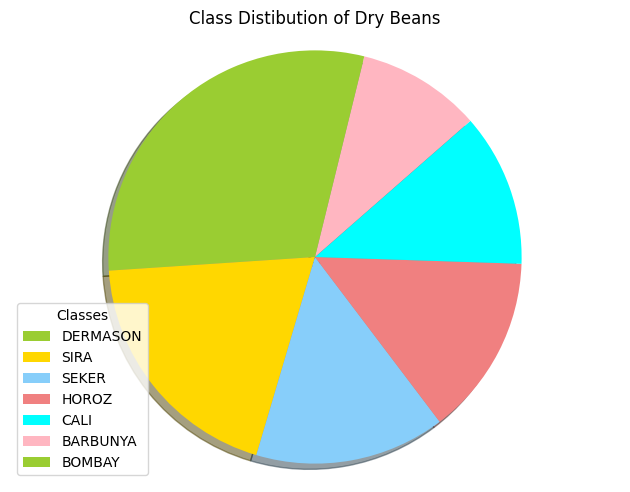

In [36]:
# Visualizing Outcome Distribution
temp = df['Class'].value_counts()
df_classes = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df_classes['labels']
sizes = df_classes['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best", title="Classes")
plt.axis('equal')
plt.tight_layout()
plt.title('Class Distibution of Dry Beans')
plt.show()

Ideally, each class should be distributed approximately equally. We do observe some imbalance in the distribution, however we will not consider the bias here.

### <font size = 5><b>b. Training

Here, we aim to train a SVM model on the dataset following modern Machine Learning Practice. First, we want to split the data frame into train and test set with 8: 2 ratio, which is widely adopted by Machine Learning community.

In [37]:
# Split data in to train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

We first isolate the inputs and outputs in our training and test set. Recall we still have the outputs "Class" as categorical string values, the preprocessing.LabelEncoder() fucntion is used to encode these 7 classes of dye beans. Additionally, inputs of the training and testing dataset should be applied with normalization base on the mean and standard deviation of the training set. This normalization concept was covered in Chapter 6 of the textbook [8], where it well explained why this is necessary.

In [38]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Class'],axis=1))
y_train_label = train.Class.values
X_test = pd.DataFrame(test.drop(['Class'],axis=1))
y_test_label = test.Class.values

# Dimension of Train and Test set
print("Dimension of Train set", X_train.shape)
print("Dimension of Test set", X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
encoder = preprocessing.LabelEncoder()

# encoding train labels
encoder.fit(y_train_label)
y_train = encoder.transform(y_train_label)

# encoding test labels
encoder.fit(y_test_label)
y_test = encoder.transform(y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and apply normalization/standard scaling
X_train_scaled = scaler.fit_transform(X_train)
# apply normalization/standard scaling
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (10888, 16)
Dimension of Test set (2723, 16) 

Number of numeric features: 16


In [39]:
X_train_scaled.shape, X_test_scaled.shape

((10888, 16), (2723, 16))

In [40]:
y_train.shape, y_test.shape

((10888,), (2723,))

We use the GridSearchCV from scikit-learn [5] to perform hyperparameter tuning for our Support Vector Machine (SVM) classifier, which is a common approach to finding the best combination of hyperparameters. We also defines a grid of hyperparameters to search over. For the 'rbf' kernel, it searches over different values of 'gamma' and 'C'. For the 'linear' kernel, it searches over different values of 'C'.

In [41]:
# Create the parameter grid based on the results of random search
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

The cross-validated grid search exhaustively considers all parameter combinations in the parameter grid by training the SVM classifier with 5-fold cross-validation. Cross-validation was cover in Chapter 8.3 in the textbook [8].

Note: The following cell may take minutes to run !

In [42]:
# Performing CV to tune parameters for best SVM fit
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

### <font size = 5><b>c. Results

We report the training accuracy score and the best parameters we searched through during the training. Moreover, the confusion matrix is also produced for visualization. Finally, the testing clasification report is generated along with the accuracy of the testing.

In the report, the precision is the ratio of correctly predicted positive observations to the total predicted positives, and high precision indicates a low false positive rate. Recall is the ratio of correctly predicted positive observations to the total actual positives, where high recall indicates a low false negative rate. Furthermore, F1-score is the weighted average of precision and recall. Lastly, Support is the number of actual occurrences of the class in the specified dataset.

In [43]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test_scaled)
# y_pred_label = list(encoder.inverse_transform(y_pred))

Best score for training data: 0.9298311970922318 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [44]:
np.unique(y)

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [45]:
encoder.transform(np.unique(y))

array([0, 1, 2, 3, 4, 5, 6])

Confusion Matrix:


<Axes: >

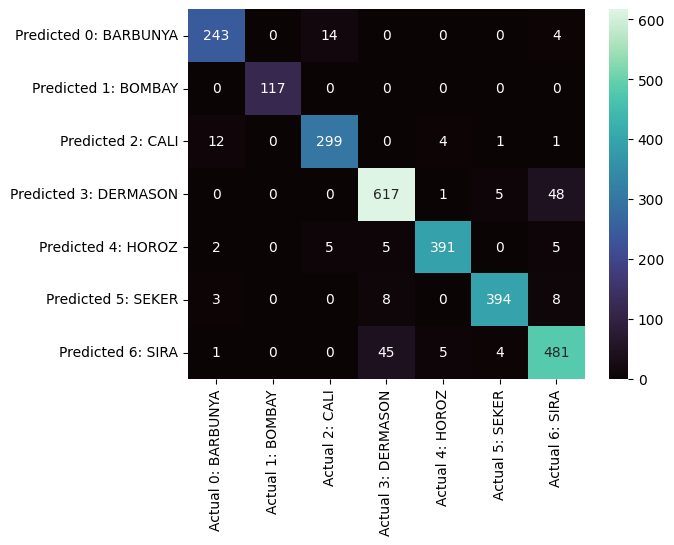

In [46]:
# Confusion Matrix
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 0: BARBUNYA', 'Actual 1: BOMBAY', 'Actual 2: CALI', 'Actual 3: DERMASON', 'Actual 4: HOROZ', 'Actual 5: SEKER', 'Actual 6: SIRA'],
                                 index=['Predicted 0: BARBUNYA', 'Predicted 1: BOMBAY', 'Predicted 2: CALI', 'Predicted 3: DERMASON', 'Predicted 4: HOROZ', 'Predicted 5: SEKER', 'Predicted 6: SIRA'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')



In [47]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))

print("\n")
print(classification_report(y_test, y_pred))

print("Training set score for SVM: %f" % svm_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: %f" % svm_model.score(X_test_scaled  , y_test ))

svm_model.score



              precision    recall  f1-score   support

           0       0.93      0.93      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.94      0.94       317
           3       0.91      0.92      0.92       671
           4       0.98      0.96      0.97       408
           5       0.98      0.95      0.96       413
           6       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

Training set score for SVM: 0.932127
Testing  set score for SVM: 0.933529


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

## <font size = 6><b>3. Reference

1. Sidharth, Implementing SVM from Scratch Using Python, Dec 4, 2022, https://www.pycodemates.com/2022/10/implementing-SVM-from-scratch-in-python.html

2. Qestion post by Mehran Torki, Kernels in SVM primal form, StackExchange, Apr 24, 2020, https://stats.stackexchange.com/questions/463255/kernels-in-svm-primal-form

3. Abhisek Jana, Support Vector Machines for Beginners – Training Algorithms, Apr 5, 2020 https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-training-algorithms/#training-primal-svm-using-kernel

4. Question post by blubb, Why bother with the dual problem when fitting SVM?, Nov 30, 2011, https://stats.stackexchange.com/questions/19181/why-bother-with-the-dual-problem-when-fitting-svm

5. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825-2830.

6. Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362.

7. J. D. Hunter. Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

8. Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). Mathematics for Machine Learning. Cambridge University Press.

9. Dry Bean Dataset. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C50S4B.

10. PRANATHI CHUNDURU, Kaggle, SVM for Multiclass Classification, 2018, https://www.kaggle.com/code/pranathichunduru/svm-for-multiclass-classification